NAME - SHRINIVAS MOGLE 

PRN - RBT21CB014

### Aim:
To evaluate and compare the performance of multiple supervised learning algorithms for the task of credit card fraud detection.

### Objective:
- Assess the effectiveness of different algorithms in accurately identifying fraudulent credit card transactions.
- Determine the strengths and weaknesses of each algorithm in handling imbalanced data inherent in fraud detection tasks.
- Compare key performance metrics like accuracy, precision, recall, and F1 score among the algorithms.
- Identify the algorithm that provides the best balance of precision and recall for fraud detection.

### Tools Used:
- Programming Language: Python
- Libraries: scikit-learn for implementing machine learning algorithms, Pandas for data handling, Matplotlib/Seaborn for visualization

### Language:
Python will be used for implementing and comparing the supervised learning algorithms due to its extensive libraries for machine learning and data analysis.

### Description:
1. **Data Loading and Preprocessing**:
   - Load the credit card transaction dataset and preprocess it, handling missing values, scaling numerical features, and encoding categorical variables if necessary.
   
2. **Splitting the Dataset**:
   - Divide the dataset into training and testing sets, preserving the class distribution (consider stratified sampling due to class imbalance).

3. **Algorithm Implementation**:
   - Implement the following supervised learning algorithms:
     - Support Vector Machine (SVM)
     - Naive Bayes
     - Decision Tree (DT)
     - K-Nearest Neighbors (KNN)
     - Random Forest

4. **Model Training and Evaluation**:
   - Train each model using the training set.
   - Evaluate models on the test set using metrics like:
     - Accuracy: Overall correctness of the model.
     - Precision: Proportion of correctly predicted fraud among all predicted fraud.
     - Recall: Proportion of correctly predicted fraud among actual fraud.
     - F1 Score: Harmonic mean of precision and recall, balancing both metrics.
     - ROC curves and AUC scores: Assessing model performance across various thresholds.

5. **Handling Imbalanced Data**:
   - For algorithms sensitive to class imbalance, apply techniques like oversampling, undersampling, or use algorithm-specific methods to handle imbalanced data.

6. **Comparative Analysis**:
   - Compare the performance metrics obtained from different algorithms.
   - Analyze trade-offs between precision and recall, particularly for fraud detection where false negatives (missed fraud) and false positives (incorrectly identified transactions as fraud) are crucial.
   - Visualize and interpret results using graphs, confusion matrices, and performance curves.

7. **Conclusion and Recommendations**:
   - Summarize the findings, highlighting the algorithm(s) that performed best for credit card fraud detection.
   - Provide insights into the strengths and limitations of each algorithm.
   - Suggest recommendations for selecting the most suitable algorithm(s) based on the specific business requirements and constraints.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
data = pd.read_csv(r"C:\Users\satish prasad\Desktop\CAPSTONE PROJECT\ML PROJECT\creditcard.csv")

In [76]:
pd.options.display.max_columns = None

# 1. Display Top 5 Rows of The Dataset


In [77]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Check Last 5 Rows of The Dataset


In [78]:
data.tail()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [79]:
data.shape

(284807, 31)

In [80]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Check Null Values In The Dataset

In [82]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [85]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [86]:
data = data.drop(['Time'],axis=1)


In [87]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [88]:
data.shape

(284807, 30)

In [89]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [90]:
data = data.drop_duplicates()


In [91]:
data.shape

(275663, 30)

In [92]:
284807- 275663

9144

# 6. Not Handling Imbalanced


In [93]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [94]:
import seaborn as sns

<AxesSubplot:xlabel='Class', ylabel='count'>

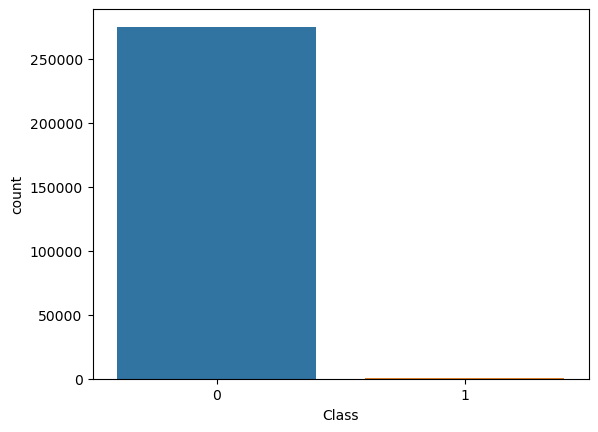

In [95]:
sns.countplot(data['Class'])

# 7. Store Feature Matrix In X And Response (Target) In Vector y

In [96]:
X = data.drop('Class',axis=1)
y = data['Class']

# 8. Splitting The Dataset Into The Training Set And Test Set

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 9. Handling Imbalanced Dataset


Undersampling

In [98]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [99]:
normal.shape

(275190, 30)

In [100]:
fraud.shape

(473, 30)

In [101]:
normal_sample=normal.sample(n=473)

In [102]:
normal_sample.shape

(473, 30)

In [103]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [104]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [105]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.538461,1.238257,-0.845592,-2.152396,1.748479,3.792862,-0.821302,1.676334,0.718978,-0.294491,-0.332898,0.370552,-0.124697,0.196898,0.714987,0.245879,-0.475231,-0.267444,-0.327131,0.008729,-0.134424,-0.590098,0.108979,0.658091,-0.110467,-0.305178,-0.571844,-0.220793,-0.350151,0
1,-1.430798,1.558092,1.356216,1.448073,-1.011201,0.159212,-0.508960,1.094697,-0.318561,-0.209015,0.645796,1.876499,0.889497,0.077800,-1.526860,-0.715369,0.623128,0.208268,1.373248,0.125255,0.070957,0.512048,-0.090333,0.588702,0.105039,-0.205072,0.307944,0.111419,-0.333639,0
2,-0.627767,1.401584,0.587030,-0.098498,0.169673,-0.529544,0.407151,0.364439,-0.618614,-0.760383,-0.985089,0.191207,1.057887,-0.308745,0.836127,0.716068,-0.170394,0.085890,0.214062,0.090894,-0.264875,-0.795027,-0.057294,-0.488486,0.002934,0.123776,0.121780,0.029511,-0.313169,0
3,-0.891690,0.848393,1.582503,1.075625,-0.772975,3.191075,-3.210739,-4.556613,0.190417,-1.471703,-0.601394,1.330332,0.027501,0.078237,-0.763819,0.580890,-0.295473,1.262788,0.671015,1.371782,-2.432723,1.298548,-0.412563,-0.188001,1.396298,-0.138049,0.129194,0.215944,-0.102949,0
4,-0.696796,1.173694,0.783877,-0.060218,0.084085,-0.432273,0.545099,0.424396,-1.179629,-0.550921,1.504886,1.112649,0.311395,0.806083,-0.043252,-0.178968,-0.045143,-0.326667,-0.109033,-0.151742,0.216164,0.504178,-0.020453,0.265519,-0.416208,0.254416,-0.019280,0.075682,-0.285302,0


In [106]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

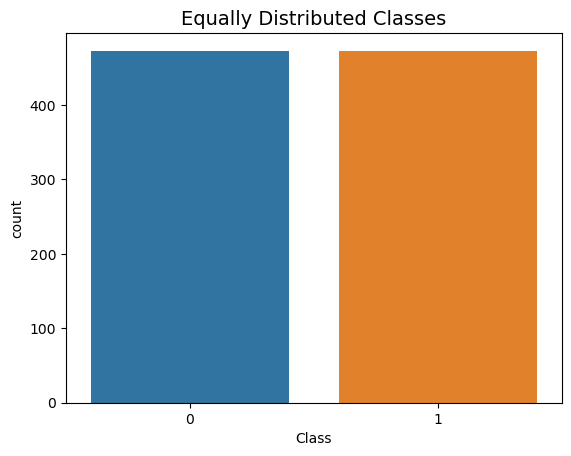

In [107]:
sns.countplot('Class', data=new_data)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# A). Decision Tree Classifier

In [109]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [110]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)
dtc=dt.score(X_test,y_test)

# B). k_nearest_neighbours_classification

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

In [112]:
# Creating the KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed


In [113]:
# Training the model
knn.fit(X_train, y_train)
dt.score(X_test,y_test)
knnc=dt.score(X_test,y_test)

# C).SVM

In [114]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)
svmc=classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)
df = pd.DataFrame({'Predicted values' : y_pred, 'Actual_values': y_test})

# D).NAIVE BAYES

In [115]:
# Fitting naive byes classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)
# Predicting the Test set results
y_pred2 = classifier.predict(X_test)
nbc=classifier.score(X_test,y_test)


# F) Random Forest 

In [116]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
rfc=classifier.score(X_test,y_test)


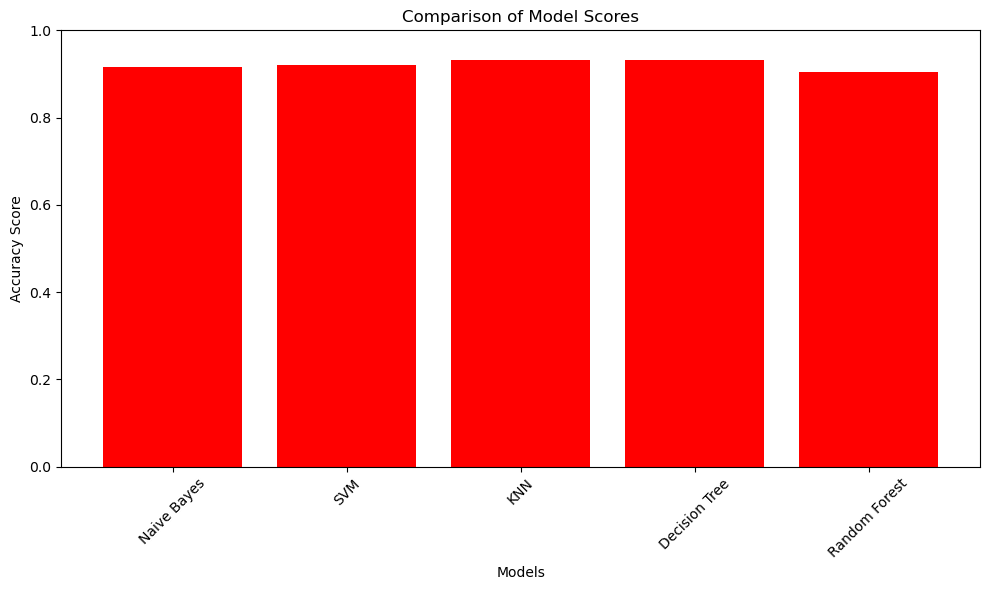

In [119]:
model_scores = {
    'Model': ['Naive Bayes', 'SVM', 'KNN', 'Decision Tree', 'Random Forest'],
    'Score': [nbc, svmc, knnc, dtc, rfc]
}

scores_df = pd.DataFrame(model_scores)

plt.figure(figsize=(10, 6))
plt.bar(scores_df['Model'], scores_df['Score'], color='red')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Scores')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1 (accuracy)
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()
plt.show()